# Vanilla Gradient Descent

implementation of gradient descent using only numpy

Notes:

<a href>http://cs229.stanford.edu/notes/cs229-notes1.pdf</a>

In [1]:
import numpy as np
from functools import reduce
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('banks.csv')

In [3]:
data = data.drop(['Financial Institution Number', 'Insurance Fund','Institution Name', 'Institution Type', 'Headquarters', 'Failure Date', 'Certificate Number', 'Transaction Type', 'Estimated Loss (2015)'], axis=1)
data.drop(['Charter Type',], axis=1, inplace=True)
data = data[data['Total Assets'] < 2000263.0]
data = data[data['Total Assets'] > 1000000]
data = data[data['Total Deposits'] < 2000263.0]
data = data[data['Total Deposits'] > 1000000]

In [4]:
data

,Total Deposits,Total Assets
804,1498748,1516512.0
956,1301346,1754157.0
994,1806271,1960164.0
1028,1500237,1680854.0
1095,1582967,1347012.0
1133,1392604,1014023.0
1162,1241839,1892038.0
1360,1314891,1688329.0
1379,1568528,1956560.0
1506,1448432,1207294.0


In [52]:
class gradient_descent:
    
    def __init__(self, x, y, epochs, rate, debug=False):
        """
        Initial Variables
        
        self.x = array of the training data values
        self.y = array of the label/results of the models
        epochs = number of iteration that the gradient descent will be doing for the model
        """
        self.x = np.array([x])
        self.y = np.array([y])
        self.epochs = epochs
        self.learning_rate = rate
        self.debug = debug
        self.model_thetas = [np.random.rand(np.multiply(*self.x.shape),1)]
        self.model_costs = []
        self.model_hypothesis = []
    
    def reset_values(self):
        self.model_costs = []
        self.model_hypothesis = []
        
    def set_thetas(self, theta):
        self.model_thetas = theta
        
    def thetas(self):
        return self.model_thetas
    
    def costs(self):
        return self.model_costs
    
    def hypo(self):
        return self.model_hypothesis
    
    def minimized(self):
        output = {
            'thetas': self.model_thetas[-1],
            'costs': self.model_costs[-1],
            'hypothesis': self.model_hypothesis[-1]
        }
        return output
    
    def batchGD(self):
        self.reset_values()
        for i in range(self.epochs):
#             print(i)
            hypothesis = self.model_thetas[-1].transpose()*self.x.reshape(1, np.multiply(*self.x.shape))
            print(self.x.reshape(1, np.multiply(*self.x.shape)).shape)
            new_cost = np.divide(np.sum(np.square(np.subtract(hypothesis, self.y))),self.x.shape[1])
            MLE = np.subtract(self.y, hypothesis).dot(self.x.reshape(self.y.shape[1],1))[0]
            new_theta = np.add(self.model_thetas[-1],np.multiply(self.learning_rate,  MLE))
            self.model_hypothesis.append(hypothesis)
            self.model_costs.append(new_cost)
            self.model_thetas.append(new_theta)
    
    def stochasticGD(self):
        self.reset_values()
        for i in range(self.epochs):
#             print(i)
            for j in range(np.multiply(*self.x.shape)):
                hypothesis = self.model_thetas[-1].transpose()*self.x.reshape(1, np.multiply(*self.x.shape))
                self.model_hypothesis.append(hypothesis)
            new_cost = np.divide(np.sum(np.square(np.subtract(hypothesis, self.y))),self.x.shape[1])
            MLE = np.subtract(self.y, hypothesis).dot(self.x.reshape(self.y.shape[1],1))[0]
            new_theta = np.add(self.model_thetas[-1],np.multiply(self.learning_rate,  MLE))
            self.model_costs.append(new_cost)
            self.model_thetas.append(new_theta)
    
    def minibatchGD(self):
        pass

### Use the class

In [53]:
BGD = gradient_descent(x=data['Total Deposits'][:4], 
                         y=data['Total Assets'][:4], 
                         epochs=500, 
                         rate=1e-15, 
                         debug=False)
SGD = gradient_descent(x=data['Total Deposits'][:4], 
                         y=data['Total Assets'][:4], 
                         epochs=500, 
                         rate=1e-15, 
                         debug=False)

In [54]:
BGD.batchGD()
SGD.stochasticGD()

(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)
(1, 4)

In [41]:
BGD.minimized()

{'costs': 165969900543.57098,
 'hypothesis': array([[  974147.62115654,  2116427.21731978,  2356690.44716705,
          1395814.4429624 ]]),
 'thetas': array([[ 0.65002708],
        [ 1.62638987],
        [ 1.30477977],
        [ 0.93044878]])}

In [42]:
SGD.minimized()

{'costs': 134383733869.46655,
 'hypothesis': array([[ 1406044.88557016,  2395487.75072814,  1791757.19086661,
          1388166.50980712]]),
 'thetas': array([[ 0.93822055],
        [ 1.84085123],
        [ 0.99203902],
        [ 0.9253724 ]])}

### Visualization

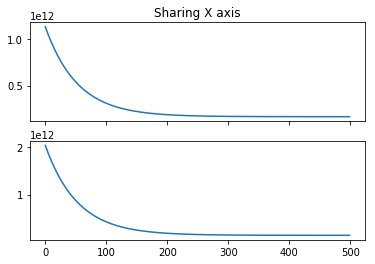

In [43]:
#Costs 
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(BGD.costs())
axarr[0].set_title('Sharing X axis')
axarr[1].plot(SGD.costs())

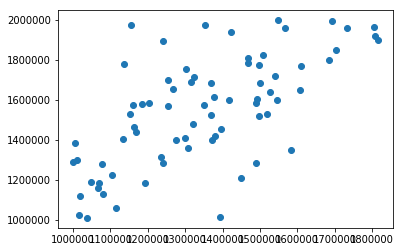

In [45]:
plt.plot()
plt.scatter(data['Total Deposits'], data['Total Assets'])
plt.show()

##### Costs

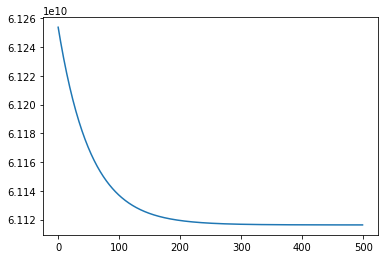

In [27]:
plt.plot(house.costs())
plt.show()

##### Thetas

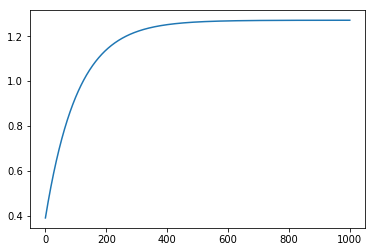

In [28]:
#First Theta
plt.plot([house.thetas()[i][0] for i in range(len(house.thetas()))])
plt.show()

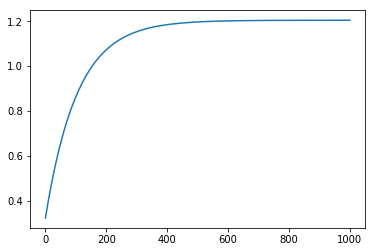

In [29]:
#Second Theta
plt.plot([house.thetas()[i][1] for i in range(len(house.thetas()))])
plt.show()

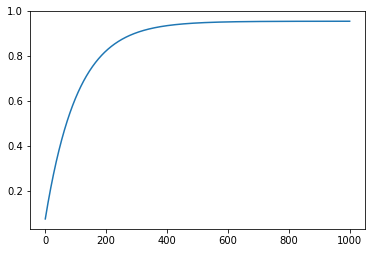

In [30]:
#Second Theta
plt.plot([house.thetas()[i][2] for i in range(len(house.thetas()))])
plt.show()

##### Model

In [31]:
house.minimized()['hypothesis']

array([[ 1904953.58723372,  1567160.96219962,  1724876.63538425,
         1737866.62928494]])

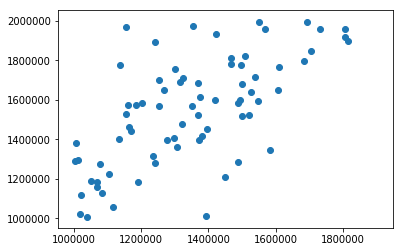

In [32]:
plt.plot(house.minimized()['hypothesis'], np.array(data['Total Assets'][:4]).reshape(1,4), 'k')
plt.scatter(data['Total Deposits'], data['Total Assets'])
plt.show()

### Testing

In [22]:
a = np.array([[1,2,3], [4,5,6]])

In [23]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
a.shape

(2, 3)

In [26]:
a.reshape(1, 6)

array([[1, 2, 3, 4, 5, 6]])

In [27]:
a = np.array([[5,2,3],[1,2,3]])

In [31]:
np.multiply(*a.shape)

6